In [6]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt


In [7]:
#For the Watchfree null duration and detection KPI 
df = pd.read_csv("Total_Detections_daily.csv")
df = df[df['session_type'] == 'null session']


In [8]:
df.tail (10)

,dd,session_type,cnt,perc_sessions,perc_duration
141,2023-06-10 00:00:00.000000,null session,187453488,0.647891,0.776058
143,2023-06-11 00:00:00.000000,null session,194580187,0.649243,0.778378
145,2023-06-12 00:00:00.000000,null session,188365291,0.645175,0.777163
147,2023-06-13 00:00:00.000000,null session,186752761,0.637674,0.762447
149,2023-06-14 00:00:00.000000,null session,183351229,0.645249,0.773485
151,2023-06-15 00:00:00.000000,null session,180373754,0.645680,0.773061
153,2023-06-16 00:00:00.000000,null session,180778528,0.644562,0.771657
155,2023-06-17 00:00:00.000000,null session,183238638,0.649122,0.779825
157,2023-06-18 00:00:00.000000,null session,183507802,0.647999,0.774746
159,2023-06-19 00:00:00.000000,null session,173674633,0.649611,0.775384


In [9]:
df['dd'] = pd.to_datetime(df['dd'])
print(df.dtypes)

dd               datetime64[ns]
session_type             object
cnt                       int64
perc_sessions           float64
perc_duration           float64
dtype: object


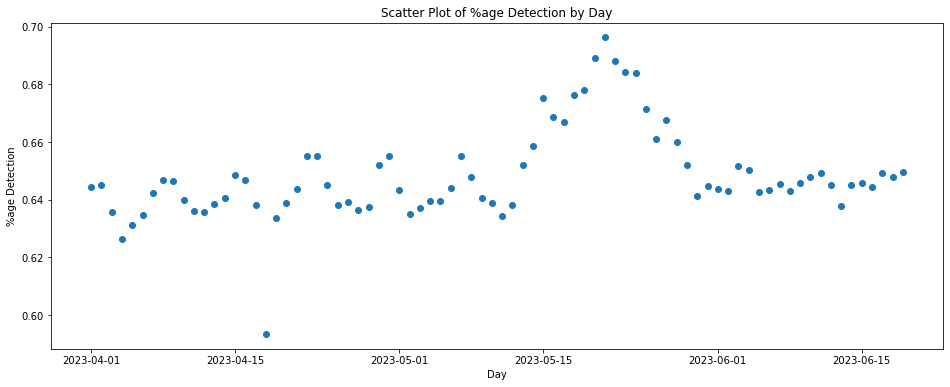

In [10]:
# Plotting the scatter plot for null_content_record_percentage
plt.figure(figsize=(16 , 6))
plt.scatter(df['dd'], df['perc_sessions'])
plt.xlabel('Day')
plt.ylabel('%age Detection')
plt.title('Scatter Plot of %age Detection by Day')
plt.show()

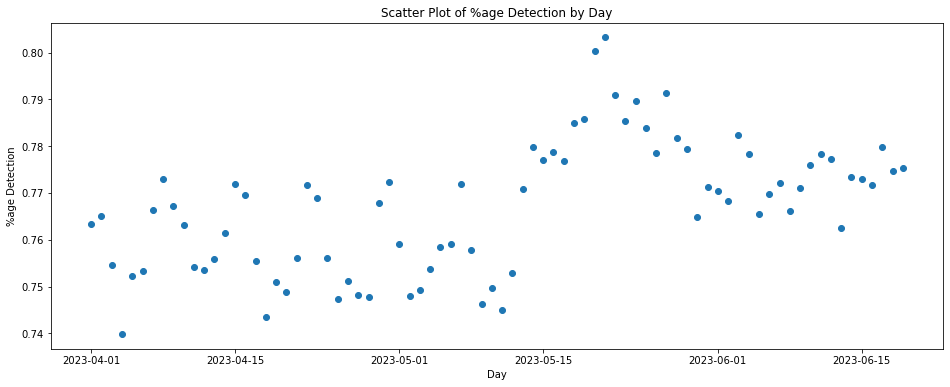

In [20]:
# Plotting the scatter plot for null_content_record_percentage
plt.figure(figsize=(16 , 6))
plt.scatter(df['dd'], df['perc_duration'])
plt.xlabel('Day')
plt.ylabel('%age Detection')
plt.title('Scatter Plot of %age Detection by Day')
plt.show()

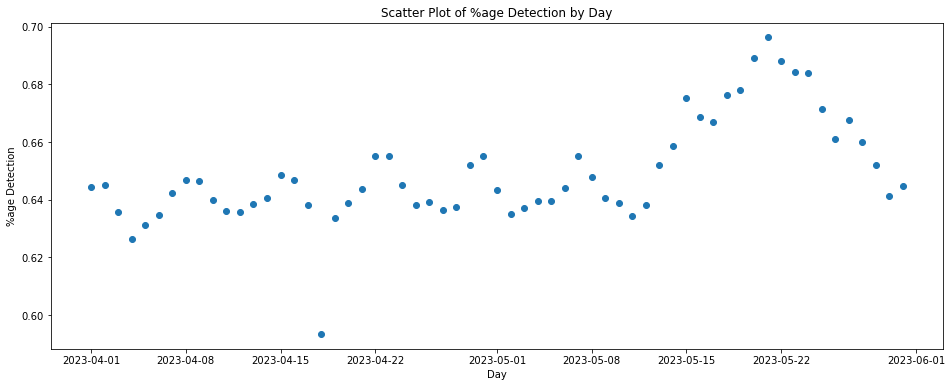

In [14]:
# Filter for the month of April & May  2023
past_date = df[(df['dd'].dt.month.isin([4,5])) & (df['dd'].dt.year == 2023)]
# Plotting the scatter plot for null_content_record_percentage
plt.figure(figsize=(16 , 6))
plt.scatter(past_date['dd'], past_date['perc_sessions'])
plt.xlabel('Day')
plt.ylabel('%age Detection')
plt.title('Scatter Plot of %age Detection by Day')
plt.show()

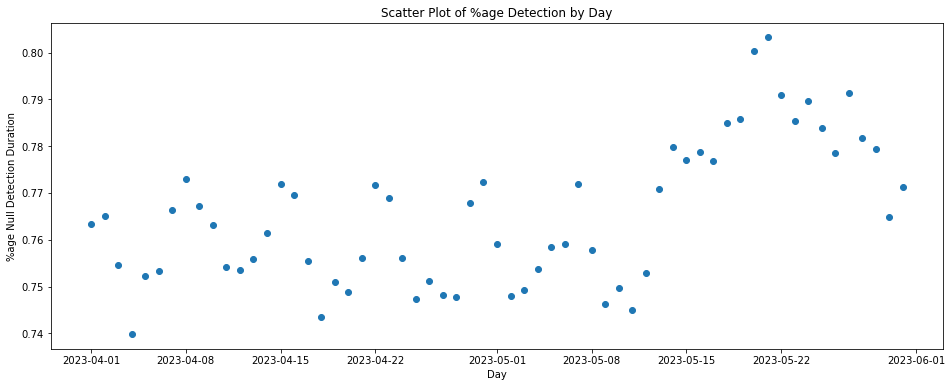

In [21]:
plt.figure(figsize=(16 , 6))
plt.scatter(past_date['dd'], past_date['perc_duration'])
plt.xlabel('Day')
plt.ylabel('%age Null Detection Duration')
plt.title('Scatter Plot of %age Detection by Day')
plt.show()

In [80]:
# Lets take the same normal as null for Watchfree + 
# Filter the data from April 11 to May 14 which is our new normal
filtered_df = df[(df['dd'] >= '2023-04-11') & (df['dd'] <= '2023-05-14')]
filtered_df.head()

,dd,session_type,cnt,perc_sessions,perc_duration
21,2023-04-11,null session,172396910,0.636202,0.754172
23,2023-04-12,null session,170239737,0.635770,0.753611
25,2023-04-13,null session,169605788,0.638434,0.755951
27,2023-04-14,null session,170330118,0.640521,0.761437
29,2023-04-15,null session,183113861,0.648666,0.771975


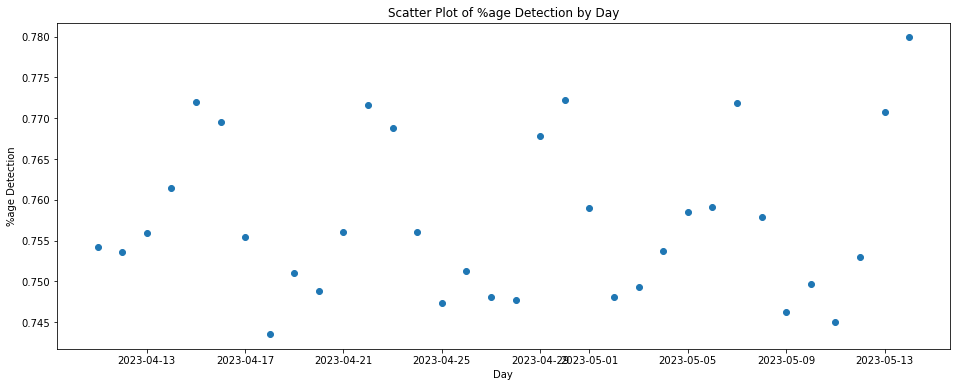

In [82]:
# Filter for the month of April & May  2023

# Plotting the scatter plot for null_content_record_percentage
plt.figure(figsize=(16 , 6))
plt.scatter(filtered_df['dd'], filtered_df['perc_duration'])
plt.xlabel('Day')
plt.ylabel('%age Detection')
plt.title('Scatter Plot of %age Detection by Day')
plt.show()

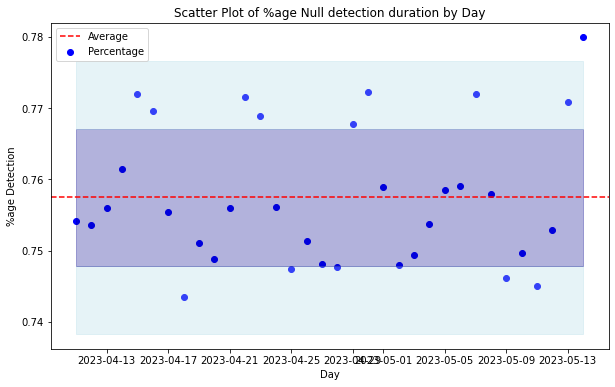

In [23]:
# Plotting the scatter plot
plt.figure(figsize=(10, 6))

#Add the average and standard deviaton
avg = np.mean(filtered_df['perc_duration'])
std_dev = np.std(filtered_df['perc_duration'])



lower_bound = avg - std_dev
upper_bound = avg + std_dev
lower_bound2 = avg - 2 * std_dev
upper_bound2 = avg + 2 * std_dev
lower_bound3 = avg - 3 * std_dev
upper_bound3 = avg + 3 * std_dev

# Plot scatter plot
plt.scatter(filtered_df['dd'], filtered_df['perc_duration'], color='blue', label='Percentage')

# Plot average line
plt.axhline(y=avg, color='red', linestyle='--', label='Average')

# Plot shaded regions for standard deviations

plt.fill_between(filtered_df['dd'], lower_bound2, lower_bound, color='lightblue', alpha=0.3)
plt.fill_between(filtered_df['dd'], lower_bound, upper_bound, color='darkblue', alpha=0.3)
plt.fill_between(filtered_df['dd'], upper_bound, upper_bound2, color='lightblue', alpha=0.3)

plt.xlabel('Day')
plt.ylabel('%age Detection')
plt.title('Scatter Plot of %age Null detection duration by Day')
plt.legend()
plt.show()

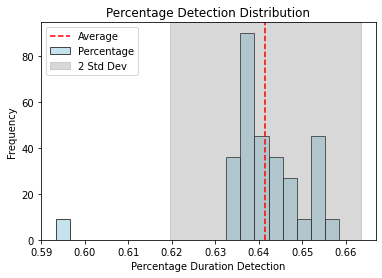

In [27]:
# Plot histogram
plt.hist(filtered_df['perc_sessions'], bins=20, density=True, color='lightblue', edgecolor='black', alpha=0.7, label='Percentage')

# Plot average line


avg = np.mean(filtered_df['perc_sessions'])
std_dev = np.std(filtered_df['perc_sessions'])

# Calculate upper and lower bounds for 2 standard deviations
plt.axvline(x=avg, color='red', linestyle='--', label='Average')
lower_bound = avg - 2 * std_dev
upper_bound = avg + 2 * std_dev

# Plot shaded regions for 2 standard deviations
plt.axvspan(lower_bound, upper_bound, color='gray', alpha=0.3, label='2 Std Dev')

# Configure plot
plt.xlabel('Percentage Duration Detection')
plt.ylabel('Frequency')
plt.title('Percentage Detection Distribution')
plt.legend()

# Display the plot
plt.show()

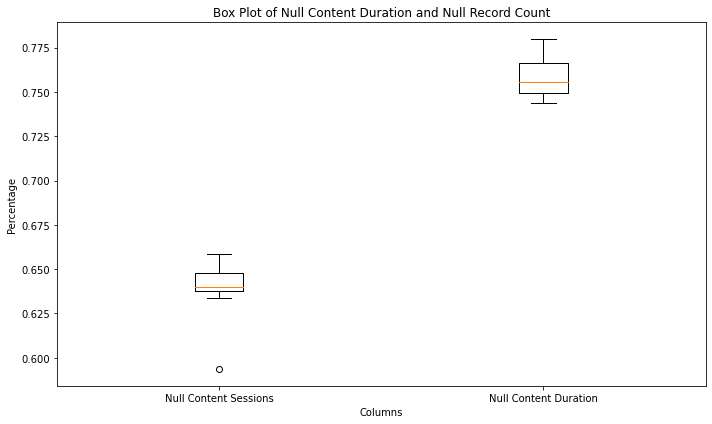

In [28]:
#Do the IQR thingy 

# Create a new figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create a box plot
boxplot_data = [filtered_df['perc_sessions'], filtered_df['perc_duration']]
ax.boxplot(boxplot_data, labels=['Null Content Sessions', 'Null Content Duration'])

# Set axis labels and title
ax.set_xlabel('Columns')
ax.set_ylabel('Percentage')
ax.set_title('Box Plot of Null Content Duration and Null Record Count')

# Adjust the layout to prevent labels from being cut off
plt.tight_layout()

# Show the plot
plt.show()

In [30]:
#For null Content Duration 
median = filtered_df['perc_duration'].median()
q1 = filtered_df['perc_duration'].quantile(0.25)
q3 = filtered_df['perc_duration'].quantile(0.75)
print(median, q1, q3)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
print(iqr, lower_bound, upper_bound)

0.7557014102727322 0.7494086358622434 0.7661800447567316
0.01677140889448825 0.7242515225205111 0.791337158098464


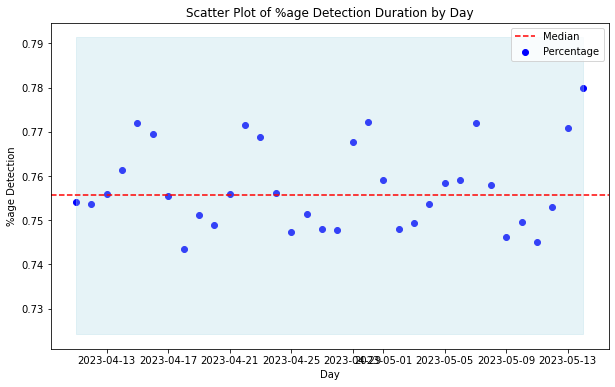

In [31]:
# Plotting the scatter plot
plt.figure(figsize=(10, 6))

#Add the average and standard deviaton
median = filtered_df['perc_duration'].median()
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Plot scatter plot
plt.scatter(filtered_df['dd'], filtered_df['perc_duration'], color='blue', label='Percentage')

# Plot average line
plt.axhline(y=median, color='red', linestyle='--', label='Median')

# Plot shaded the outliers range

plt.fill_between(filtered_df['dd'], lower_bound, upper_bound, color='lightblue', alpha=0.3)


plt.xlabel('Day')
plt.ylabel('%age Detection')
plt.title('Scatter Plot of %age Detection Duration by Day')
plt.legend()
plt.show()

In [32]:
# Do it on the new data now 
new_df = df[(df['dd'] >= '2023-05-14')]
new_df.head(10)

,dd,session_type,cnt,perc_sessions,perc_duration
87,2023-05-14,null session,188435550,0.658557,0.779904
89,2023-05-15,null session,192098513,0.675159,0.777087
91,2023-05-16,null session,185982882,0.668648,0.778819
93,2023-05-17,null session,185636047,0.667002,0.776782
95,2023-05-18,null session,188073495,0.676353,0.784964
97,2023-05-19,null session,190156545,0.677992,0.785829
99,2023-05-20,null session,202891044,0.689237,0.800352
101,2023-05-21,null session,203502568,0.696225,0.803225
103,2023-05-22,null session,185837004,0.688137,0.790940
105,2023-05-23,null session,185245000,0.684136,0.785430


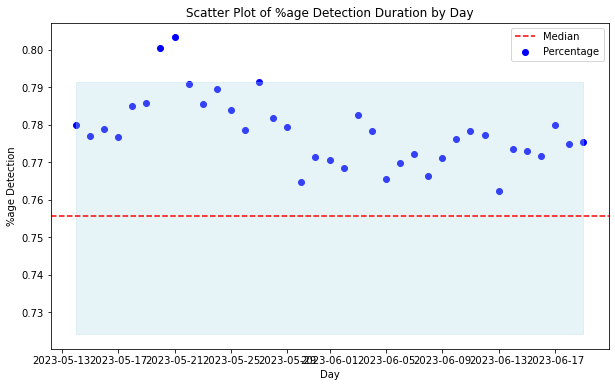

In [33]:
# Plotting the scatter plot
plt.figure(figsize=(10, 6))

# Plot scatter plot
plt.scatter(new_df['dd'], new_df['perc_duration'], color='blue', label='Percentage')

# Plot average line
plt.axhline(y=median, color='red', linestyle='--', label='Median')

# Plot shaded regions for standard deviations

plt.fill_between(new_df['dd'], lower_bound, upper_bound, color='lightblue', alpha=0.3)


plt.xlabel('Day')
plt.ylabel('%age Detection')
plt.title('Scatter Plot of %age Detection Duration by Day')
plt.legend()
plt.show()

In [34]:
new_df['is_outlier_null_dur'] = (new_df['perc_duration'] > upper_bound)

/var/folders/8_/hhlpy30n5ll_w5fz1k_r7qqm0000gp/T/ipykernel_38016/1521378629.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['is_outlier_null_dur'] = (new_df['perc_duration'] > upper_bound)


In [50]:
#For null Content Count 
median = filtered_df['perc_sessions'].median()
q1 = filtered_df['perc_sessions'].quantile(0.25)
q3 = filtered_df['perc_sessions'].quantile(0.75)
print(median, q1, q3)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
print(iqr, lower_bound, upper_bound)

0.6396886309957313 0.6376676893852653 0.6475820585953974
0.009914369210132112 0.6227961355700671 0.6624536124105955


0.6396886309957313 0.6227961355700671 0.6624536124105955


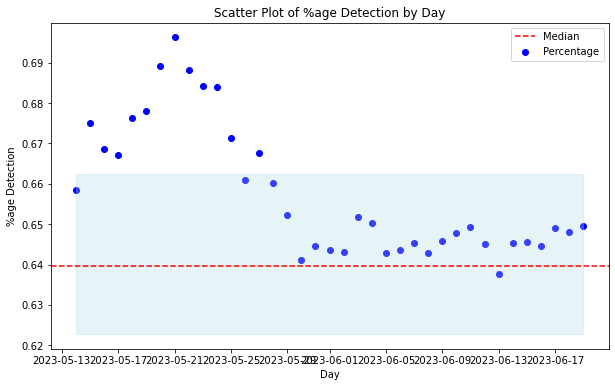

In [36]:
#Do it for null_rec_count_perc

#Add the average and standard deviaton
median = filtered_df['perc_sessions'].median()
q1 = filtered_df['perc_sessions'].quantile(0.25)
q3 = filtered_df['perc_sessions'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print(median, lower_bound, upper_bound)

plt.figure(figsize=(10, 6))

# Plot scatter plot
plt.scatter(new_df['dd'], new_df['perc_sessions'], color='blue', label='Percentage')

# Plot average line
plt.axhline(y=median, color='red', linestyle='--', label='Median')

# Plot shaded regions for standard deviations

plt.fill_between(new_df['dd'], lower_bound, upper_bound, color='lightblue', alpha=0.3)


plt.xlabel('Day')
plt.ylabel('%age Detection')
plt.title('Scatter Plot of %age Detection by Day')
plt.legend()
plt.show()

0.6396886309957313 0.6227961355700671 0.6624536124105955


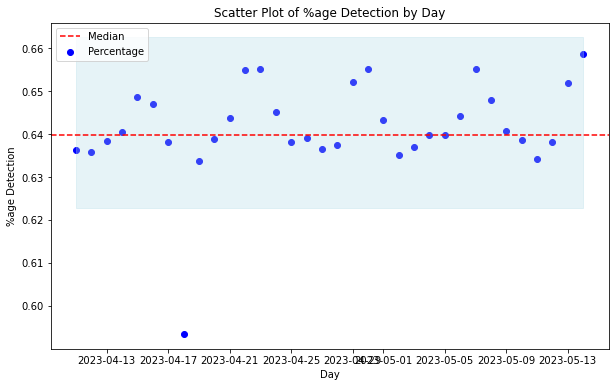

In [37]:
#Do it for null_rec_count_perc

#Add the average and standard deviaton
median = filtered_df['perc_sessions'].median()
q1 = filtered_df['perc_sessions'].quantile(0.25)
q3 = filtered_df['perc_sessions'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print(median, lower_bound, upper_bound)

plt.figure(figsize=(10, 6))

# Plot scatter plot
plt.scatter(filtered_df['dd'], filtered_df['perc_sessions'], color='blue', label='Percentage')

# Plot average line
plt.axhline(y=median, color='red', linestyle='--', label='Median')

# Plot shaded regions for standard deviations

plt.fill_between(filtered_df['dd'], lower_bound, upper_bound, color='lightblue', alpha=0.3)


plt.xlabel('Day')
plt.ylabel('%age Detection')
plt.title('Scatter Plot of %age Detection by Day')
plt.legend()
plt.show()

In [38]:
new_df['is_outlier_null_ct'] = (new_df['perc_sessions'] > upper_bound)
new_df[(new_df['is_outlier_null_dur'] == True) | (new_df['is_outlier_null_ct'] == True)]

/var/folders/8_/hhlpy30n5ll_w5fz1k_r7qqm0000gp/T/ipykernel_38016/1484949950.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['is_outlier_null_ct'] = (new_df['perc_sessions'] > upper_bound)


,dd,session_type,cnt,perc_sessions,perc_duration,is_outlier_null_dur,is_outlier_null_ct
89,2023-05-15,null session,192098513,0.675159,0.777087,False,True
91,2023-05-16,null session,185982882,0.668648,0.778819,False,True
93,2023-05-17,null session,185636047,0.667002,0.776782,False,True
95,2023-05-18,null session,188073495,0.676353,0.784964,False,True
97,2023-05-19,null session,190156545,0.677992,0.785829,False,True
99,2023-05-20,null session,202891044,0.689237,0.800352,True,True
101,2023-05-21,null session,203502568,0.696225,0.803225,True,True
103,2023-05-22,null session,185837004,0.688137,0.790940,False,True
105,2023-05-23,null session,185245000,0.684136,0.785430,False,True
107,2023-05-24,null session,184045359,0.683982,0.789592,False,True


In [67]:
#Okay it is working 
#Cannor really see it in the other graphs. change it to hourly will it still be flagged? 
df2 = pd.read_csv("Hourly_detections_null.csv")
df2 = df2[df2['session_type'] == 'null session']
df2['dd'] = pd.to_datetime(df2['dd'])
df2.head(10)

,dd,session_type,cnt,perc_sessions,perc_duration
1,2023-04-01 00:00:00,null session,11395554,0.628494,0.730212
3,2023-04-01 01:00:00,null session,11737434,0.625967,0.730091
5,2023-04-01 02:00:00,null session,11205524,0.635426,0.736883
7,2023-04-01 03:00:00,null session,10363652,0.628096,0.758782
9,2023-04-01 04:00:00,null session,8469925,0.650159,0.781163
11,2023-04-01 05:00:00,null session,6691419,0.667348,0.799723
13,2023-04-01 06:00:00,null session,5524098,0.671558,0.817073
15,2023-04-01 07:00:00,null session,4591524,0.681512,0.828316
17,2023-04-01 08:00:00,null session,4072717,0.686691,0.836431
19,2023-04-01 09:00:00,null session,3840817,0.684166,0.833891


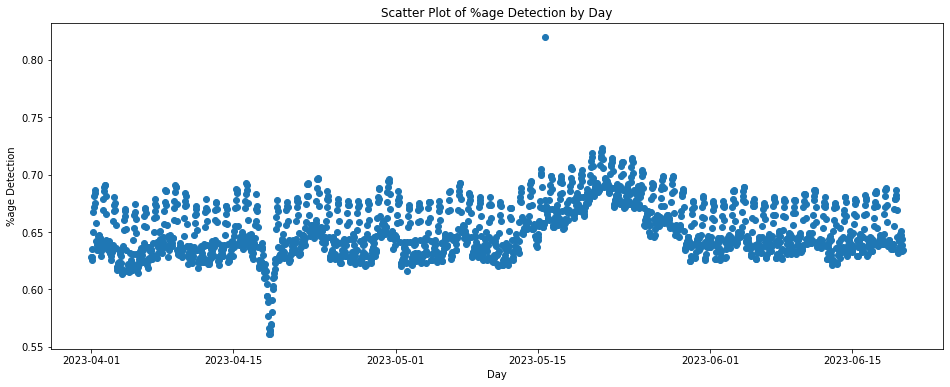

In [68]:
# Plotting the scatter plot for null_content_record_percentage
plt.figure(figsize=(16 , 6))
plt.scatter(df2['dd'], df2['perc_sessions'])
plt.xlabel('Day')
plt.ylabel('%age Detection')
plt.title('Scatter Plot of %age Detection by Day')
plt.show()

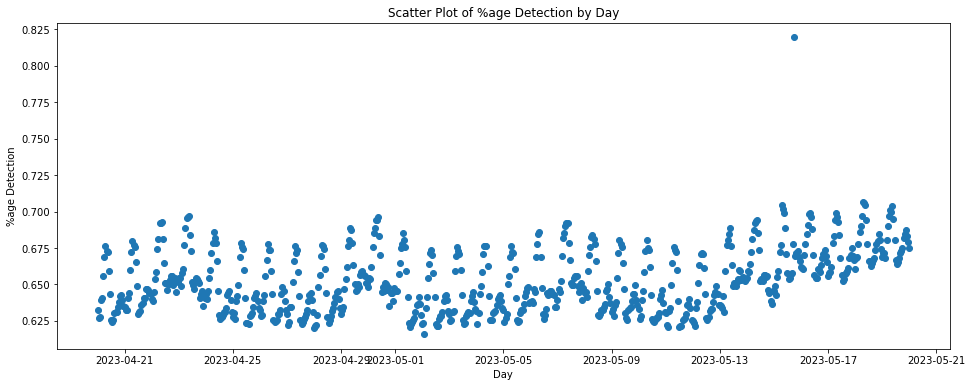

In [78]:
filtered_df = df2[(df2['dd'] >= '2023-04-20') & (df2['dd'] <= '2023-05-20')]
plt.figure(figsize=(16 , 6))
plt.scatter(filtered_df['dd'], filtered_df['perc_sessions'])
plt.xlabel('Day')
plt.ylabel('%age Detection')
plt.title('Scatter Plot of %age Detection by Day')
plt.show()

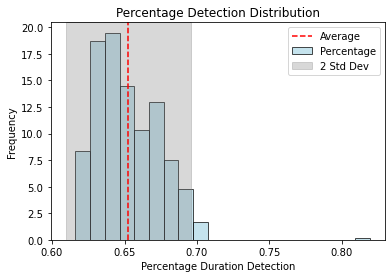

In [79]:
# Plot histogram
plt.hist(filtered_df['perc_sessions'], bins=20, density=True, color='lightblue', edgecolor='black', alpha=0.7, label='Percentage')

# Plot average line


avg = np.mean(filtered_df['perc_sessions'])
std_dev = np.std(filtered_df['perc_sessions'])

# Calculate upper and lower bounds for 2 standard deviations
plt.axvline(x=avg, color='red', linestyle='--', label='Average')
lower_bound = avg - 2 * std_dev
upper_bound = avg + 2 * std_dev

# Plot shaded regions for 2 standard deviations
plt.axvspan(lower_bound, upper_bound, color='gray', alpha=0.3, label='2 Std Dev')

# Configure plot
plt.xlabel('Percentage Duration Detection')
plt.ylabel('Frequency')
plt.title('Percentage Detection Distribution')
plt.legend()

# Display the plot
plt.show()

In [53]:
median = fil_df['perc_sessions'].median()
q1 = fil_df['perc_sessions'].quantile(0.25)
q3 = fil_df['perc_sessions'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print( q3, q1, iqr, lower_bound, upper_bound)

0.6509892069541375 0.6440702296805776 0.006918977273559945 0.6336917637702377 0.6613676728644775


In [90]:

df_cat = pd.read_csv("Category_Split.csv")

df_cat['date'] = pd.to_datetime(df_cat['date'])
df_cat

,date,fast ct,fast ct pct,antenna ct,antenna ct pct,fast dur,fast dur pct,antenna dur,antenna dur pct
0,2023-06-11,837053,0.587983,586547,0.412017,991469431,0.829700,203504451,0.170300
1,2023-06-13,779059,0.537039,671598,0.462961,944276947,0.737691,335766674,0.262309
2,2023-06-21,907818,0.523712,825613,0.476288,1181363582,0.643893,653355808,0.356107
3,2023-06-17,898613,0.556669,715654,0.443331,1087732545,0.759166,345066961,0.240834
4,2023-06-14,837290,0.567350,638502,0.432650,1073696975,0.764742,330302183,0.235258
5,2023-06-15,936698,0.599839,624884,0.400161,1179841412,0.795530,303247997,0.204470
6,2023-06-22,377374,0.559880,296652,0.440120,452127974,0.665875,226870017,0.334125
7,2023-06-12,765258,0.534610,666174,0.465390,944822510,0.756597,303957033,0.243403
8,2023-06-09,957881,0.585135,679144,0.414865,1211872077,0.776411,348992934,0.223589
9,2023-06-10,845663,0.557473,671294,0.442527,1019420444,0.786852,276147758,0.213148


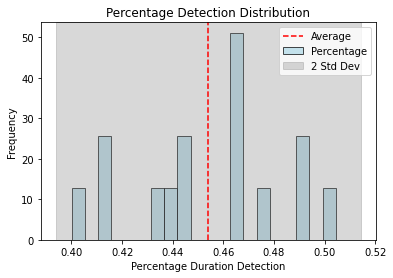

In [89]:
# Plot histogram
plt.hist(df_cat['antenna ct pct'], bins=20, density=True, color='lightblue', edgecolor='black', alpha=0.7, label='Percentage')

# Plot average line


avg = np.mean(df_cat['antenna ct pct'])
std_dev = np.std(df_cat['antenna ct pct'])

# Calculate upper and lower bounds for 2 standard deviations
plt.axvline(x=avg, color='red', linestyle='--', label='Average')
lower_bound = avg - 2 * std_dev
upper_bound = avg + 2 * std_dev

# Plot shaded regions for 2 standard deviations
plt.axvspan(lower_bound, upper_bound, color='gray', alpha=0.3, label='2 Std Dev')

# Configure plot
plt.xlabel('Percentage Duration Detection')
plt.ylabel('Frequency')
plt.title('Percentage Detection Distribution')
plt.legend()

# Display the plot
plt.show()

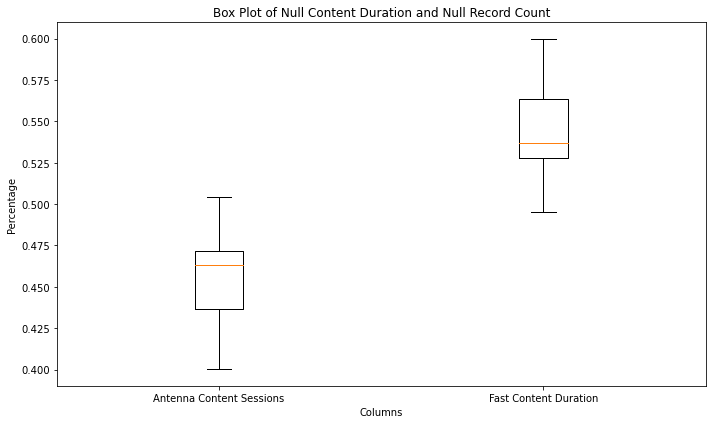

In [93]:
#Do the IQR thingy 

# Create a new figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create a box plot
boxplot_data = [df_cat['antenna ct pct'], df_cat['fast ct pct']]
ax.boxplot(boxplot_data, labels=['Antenna Content Sessions', 'Fast Content Duration'])

# Set axis labels and title
ax.set_xlabel('Columns')
ax.set_ylabel('Percentage')
ax.set_title('Box Plot of Null Content Duration and Null Record Count')

# Adjust the layout to prevent labels from being cut off
plt.tight_layout()

# Show the plot
plt.show()

0.4629612651371068 0.43638496060521137 0.47187318960832925
0.03548822900311788 0.38315261710053455 0.5251055331130061


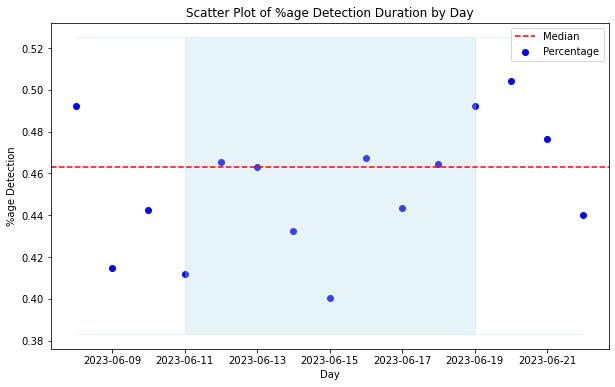

In [95]:
#For null Content Duration 
median = df_cat['antenna ct pct'].median()
q1 = df_cat['antenna ct pct'].quantile(0.25)
q3 = df_cat['antenna ct pct'].quantile(0.75)
print(median, q1, q3)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
print(iqr, lower_bound, upper_bound)

# Plotting the scatter plot

plt.figure(figsize=(10, 6))



# Plot scatter plot
plt.scatter(df_cat['date'], df_cat['antenna ct pct'], color='blue', label='Percentage')

# Plot average line
plt.axhline(y=median, color='red', linestyle='--', label='Median')

# Plot shaded the outliers range

plt.fill_between(df_cat['date'], lower_bound, upper_bound, color='lightblue', alpha=0.3)


plt.xlabel('Day')
plt.ylabel('%age Detection')
plt.title('Scatter Plot of %age Detection Duration by Day')
plt.legend()
plt.show()